In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import xlrd
from functools import reduce
from matplotlib import cm
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from IPython.display import Image  
from sklearn import datasets
import seaborn as sns; sns.set(color_codes=True)
import statsmodels.api as sm 
from statsmodels.stats.multicomp import (pairwise_tukeyhsd,
                                         MultiComparison)
import urllib
from stargazer.stargazer import Stargazer
from IPython.core.display import HTML, display
import re
import os 


See also:
http://metrocosm.com/global-immigration-map/
For more information on stargazer, used for Outreg2 style export of regression, read here:
https://cran.r-project.org/web/packages/stargazer/stargazer.pdf
https://github.com/mwburke/stargazer
https://www.jakeruss.com/cheatsheets/stargazer/

In [2]:
freedom_house = pd.ExcelFile(r'2020_All_Data_FIW_2013-2020.xlsx')
# https://freedomhouse.org/sites/default/files/2020-02/2020_All_Data_FIW_2013-2020.xlsx
# dls = "https://freedomhouse.org/sites/default/files/2020-02/2020_All_Data_FIW_2013-2020.xlsx"
# urllib.urlretrieve(dls, "freedom_house.xls")

In [3]:
index_freedom_house = pd.read_excel(freedom_house, 'Index')
data_freedom_house = pd.read_excel(freedom_house, 'FIW13-20')

In [4]:
data_freedom_house = data_freedom_house.rename(columns=data_freedom_house.iloc[0]).drop(data_freedom_house.index[0])

In [5]:
gdp = pd.ExcelFile(r'API_NY.GDP.PCAP.CD_DS2_en_excel_v2_887247.xls')
# https://data.worldbank.org/indicator/NY.GDP.PCAP.CD

In [6]:
data_gdp = pd.read_excel(gdp, 'Data')
metadata_countries_gdp = pd.read_excel(gdp, 'Metadata - Countries')

In [7]:
data_gdp = data_gdp.drop(data_gdp.index[0:3])
data_gdp.rename(columns={
'Data Source': 'Country Name',
'World Development Indicators': 'Country Code',
'Unnamed: 2': 'Indicator Name',
'Unnamed: 3': 'Indicator Code',
'Unnamed: 4': '1960',
'Unnamed: 5': '1961',
'Unnamed: 6': '1962',
'Unnamed: 7': '1963',
'Unnamed: 8': '1964',
'Unnamed: 9': '1965',
'Unnamed: 10': '1966',
'Unnamed: 11': '1967',
'Unnamed: 13': '1969',
'Unnamed: 14': '1970',
'Unnamed: 15': '1971',
'Unnamed: 16': '1972',
'Unnamed: 17': '1973',
'Unnamed: 18': '1974',
'Unnamed: 19': '1975',
'Unnamed: 20': '1976',
'Unnamed: 21': '1977',
'Unnamed: 22': '1978',
'Unnamed: 23': '1979',
'Unnamed: 24': '1980',
'Unnamed: 25': '1981',
'Unnamed: 26': '1982',
'Unnamed: 27': '1983',
'Unnamed: 28': '1984',
'Unnamed: 29': '1985',
'Unnamed: 30': '1986',
'Unnamed: 31': '1987',
'Unnamed: 32': '1988',
'Unnamed: 33': '1989',
'Unnamed: 34': '1990',
'Unnamed: 35': '1991',
'Unnamed: 36': '1992',
'Unnamed: 37': '1993',
'Unnamed: 38': '1994',
'Unnamed: 39': '1995',
'Unnamed: 40': '1996',
'Unnamed: 41': '1997',
'Unnamed: 42': '1998',
'Unnamed: 43': '1999',
'Unnamed: 44': '2000',
'Unnamed: 45': '2001',
'Unnamed: 46': '2002',
'Unnamed: 47': '2003',
'Unnamed: 48': '2004',
'Unnamed: 49': '2005',
'Unnamed: 50': '2006',
'Unnamed: 51': '2007',
'Unnamed: 52': '2008',
'Unnamed: 53': '2009',
'Unnamed: 54': '2010',
'Unnamed: 55': '2011',
'Unnamed: 56': '2012',
'Unnamed: 57': '2013',
'Unnamed: 58': '2014',
'Unnamed: 59': '2015',
'Unnamed: 60': '2016',
'Unnamed: 61': '2017',
'Unnamed: 62': '2018',
'Unnamed: 63': '2019'}, inplace=True)


In [8]:
migrant = pd.ExcelFile(r'UN_MigrantStockTotal_2019.xlsx')
# https://www.un.org/en/development/desa/population/migration/data/estimates2/data/UN_MigrantStockTotal_2019.xlsx
# Look at graphs here: https://www.un.org/en/development/desa/population/migration/data/estimates2/estimates19.asp
migrant_toc = pd.read_excel(migrant, 'CONTENTS')
migrant_country_data = pd.read_excel(migrant, 'ANNEX')
migrant_stock = pd.read_excel(migrant, 'Table 1')
migrant_total_population = pd.read_excel(migrant, 'Table 2')
migrant_percentage_of_population = pd.read_excel(migrant, 'Table 3')
migrant_refugee = pd.read_excel(migrant, 'Table 6')

In [9]:
migrant_stock.rename(columns={"Unnamed: 0": "Index", 
                              "Unnamed: 1": "Country", 
                              "Unnamed: 2": "Notes",
                              "Unnamed: 3": "Code",
                              "Unnamed: 4": "Type of data",
                              "Unnamed: 5": "Migrants-1990",
                              "Unnamed: 6": "Migrants-1995",
                              "Unnamed: 7": "Migrants-2000",
                              "Unnamed: 8": "Migrants-2005",
                              "Unnamed: 9": "Migrants-2010",
                              "Unnamed: 10": "Migrants-2015",
                              "Unnamed: 11": "Migrants-2019",
                              "Unnamed: 12": "Male_Mgirants-1990",
                              "Unnamed: 13": "Male_Mgirants-1995",
                              "Unnamed: 14": "Male_Mgirants-2000",
                              "Unnamed: 15": "Male_Mgirants-2005",
                              "Unnamed: 16": "Male_Mgirants-2010",
                              "Unnamed: 17": "Male_Mgirants-2015",
                              "Unnamed: 18": "Male_Mgirants-2019",
                              "Unnamed: 19": "Female_Migrants-1990",
                              "Unnamed: 20": "Female_Migrants-1995",
                              "Unnamed: 21": "Female_Migrants-2000",
                              "Unnamed: 22": "Female_Migrants-2005",
                              "Unnamed: 23": "Female_Migrants-2010",
                              "Unnamed: 24": "Female_Migrants-2015",
                              "Unnamed: 25": "Female_Migrants-2019"}, inplace=True)
migrant_stock = migrant_stock.drop(migrant_stock.index[0:38])

In [10]:
# the data is originally set to a text type and not a numric type
migrant_stock["Code"] = pd.to_numeric(migrant_stock["Code"])

In [11]:
# code 900 and above is used for areas
indexNames = migrant_stock[ migrant_stock['Code'] > 899 ].index

In [12]:
migrant_stock.drop(indexNames , inplace=True)

In [13]:
migrant_total_population.rename(columns={"Unnamed: 0": "Index", 
                              "Unnamed: 1": "Country", 
                              "Unnamed: 2": "Notes",
                              "Unnamed: 3": "Code",
                              "Unnamed: 4": "Migrants-1990",
                              "Unnamed: 5": "Migrants-1995",
                              "Unnamed: 6": "Migrants-2000",
                              "Unnamed: 7": "Migrants-2005",
                              "Unnamed: 8": "Migrants-2010",
                              "Unnamed: 9": "Migrants-2015",
                              "Unnamed: 10": "Migrants-2019",
                              "Unnamed: 11": "Male_Mgirants-1990",
                              "Unnamed: 12": "Male_Mgirants-1995",
                              "Unnamed: 13": "Male_Mgirants-2000",
                              "Unnamed: 14": "Male_Mgirants-2005",
                              "Unnamed: 15": "Male_Mgirants-2010",
                              "Unnamed: 16": "Male_Mgirants-2015",
                              "Unnamed: 17": "Male_Mgirants-2019",
                              "Unnamed: 18": "Female_Migrants-1990",
                              "Unnamed: 19": "Female_Migrants-1995",
                              "Unnamed: 20": "Female_Migrants-2000",
                              "Unnamed: 21": "Female_Migrants-2005",
                              "Unnamed: 22": "Female_Migrants-2010",
                              "Unnamed: 23": "Female_Migrants-2015",
                              "Unnamed: 24": "Female_Migrants-2019"}, inplace=True)
migrant_total_population = migrant_total_population.drop(migrant_total_population.index[0:38])
migrant_total_population["Code"] = pd.to_numeric(migrant_total_population["Code"])
# code 900 and above is used for areas
indexNames = migrant_total_population[ migrant_total_population['Code'] > 899 ].index
migrant_total_population.drop(indexNames , inplace=True)

In [14]:
migrant_percentage_of_population.rename(columns={"Unnamed: 0": "Index", 
                              "Unnamed: 1": "Country", 
                              "Unnamed: 2": "Notes",
                              "Unnamed: 3": "Code",
                              "Unnamed: 4": "Type of data",
                              "Unnamed: 5": "Migrants-1990",
                              "Unnamed: 6": "Migrants-1995",
                              "Unnamed: 7": "Migrants-2000",
                              "Unnamed: 8": "Migrants-2005",
                              "Unnamed: 9": "Migrants-2010",
                              "Unnamed: 10": "Migrants-2015",
                              "Unnamed: 11": "Migrants-2019",
                              "Unnamed: 12": "Male_Mgirants-1990",
                              "Unnamed: 13": "Male_Mgirants-1995",
                              "Unnamed: 14": "Male_Mgirants-2000",
                              "Unnamed: 15": "Male_Mgirants-2005",
                              "Unnamed: 16": "Male_Mgirants-2010",
                              "Unnamed: 17": "Male_Mgirants-2015",
                              "Unnamed: 18": "Male_Mgirants-2019",
                              "Unnamed: 19": "Female_Migrants-1990",
                              "Unnamed: 20": "Female_Migrants-1995",
                              "Unnamed: 21": "Female_Migrants-2000",
                              "Unnamed: 22": "Female_Migrants-2005",
                              "Unnamed: 23": "Female_Migrants-2010",
                              "Unnamed: 24": "Female_Migrants-2015",
                              "Unnamed: 25": "Female_Migrants-2019"}, inplace=True)
migrant_percentage_of_population = migrant_percentage_of_population.drop(migrant_percentage_of_population.index[0:38])
migrant_percentage_of_population["Code"] = pd.to_numeric(migrant_percentage_of_population["Code"])
# code 900 and above is used for areas
indexNames = migrant_percentage_of_population[ migrant_percentage_of_population['Code'] > 899 ].index
migrant_percentage_of_population.drop(indexNames , inplace=True)

In [15]:
migrant_refugee.rename(columns={"Unnamed: 0": "Index", 
                              "Unnamed: 1": "Country", 
                              "Unnamed: 2": "Notes",
                              "Unnamed: 3": "Code",
                              "Unnamed: 4": "Type of data",
                              "Unnamed: 5": "Refugee-1990",
                              "Unnamed: 6": "Refugee-1995",
                              "Unnamed: 7": "Refugee-2000",
                              "Unnamed: 8": "Refugee-2005",
                              "Unnamed: 9": "Refugee-2010",
                              "Unnamed: 10": "Refugee-2015",
                              "Unnamed: 11": "Refugee-2019",
                              "Unnamed: 12": "Percent_Refugee-1990",
                              "Unnamed: 13": "Percent_Refugee-1995",
                              "Unnamed: 14": "Percent_Refugee-2000",
                              "Unnamed: 15": "Percent_Refugee-2005",
                              "Unnamed: 16": "Percent_Refugee-2010",
                              "Unnamed: 17": "Percent_Refugee-2015",
                              "Unnamed: 18": "Percent_Refugee-2019"}, inplace=True)
migrant_refugee = migrant_refugee.drop(migrant_refugee.index[0:38])
migrant_refugee["Code"] = pd.to_numeric(migrant_refugee["Code"])
# code 900 and above is used for areas
indexNames = migrant_refugee[ migrant_refugee['Code'] > 899 ].index
migrant_refugee.drop(indexNames , inplace=True)

Here I turn a singal column to columns per type of demographics data

In [16]:
# https://data.un.org/_Docs/SYB/CSV/SYB62_1_201907_Population,%20Surface%20Area%20and%20Density.csv
population_surfacearea_density = pd.read_csv(r'SYB62_1_201907_Population, Surface Area and Density.csv', encoding = 'ISO-8859-1')
population_surfacearea_density = population_surfacearea_density.rename(columns=population_surfacearea_density.iloc[0]).drop(population_surfacearea_density.index[0])
population_surfacearea_density.rename(columns={population_surfacearea_density.columns[1]: "Area or Country Name"}, inplace=True)
# the data is originally set to a text type and not a numric type
population_surfacearea_density['Year'] = pd.to_numeric(population_surfacearea_density['Year'], errors='coerce',  downcast='integer')
population_surfacearea_density.dtypes

#getSurface area (thousand km2) that is only avilable in 2017 data
population_surfacearea_density_2017 = population_surfacearea_density.copy()
indexNames = population_surfacearea_density_2017[ population_surfacearea_density_2017['Year'] != 2017 ].index
population_surfacearea_density_2017.drop(indexNames , inplace=True)
population_surfacearea_density_2017 = population_surfacearea_density_2017[["Area or Country Name", "Series", "Value"]]
surface_area_thousand_km2 = population_surfacearea_density_2017.copy()
surface_area_thousand_km2.drop(surface_area_thousand_km2[surface_area_thousand_km2.Series != 'Surface area (thousand km2)'].index, inplace=True)
surface_area_thousand_km2.rename(columns={surface_area_thousand_km2.columns[2]: "Surface area (thousand km2)"}, inplace=True)
surface_area_thousand_km2 = surface_area_thousand_km2[["Area or Country Name", "Surface area (thousand km2)"]]

population_surfacearea_density_2019 = population_surfacearea_density.copy()
indexNames2 = population_surfacearea_density_2019[ population_surfacearea_density['Year'] < 2019 ].index
population_surfacearea_density_2019.drop(indexNames2 , inplace=True)
population_surfacearea_density_2019 = population_surfacearea_density[["Area or Country Name", "Series", "Value"]]

population_mid_year_estimates_millions = population_surfacearea_density_2019.copy()
population_mid_year_estimates_millions.drop(population_mid_year_estimates_millions[population_mid_year_estimates_millions.Series != 'Population mid-year estimates (millions)'].index, inplace=True)
population_mid_year_estimates_millions.rename(columns={population_mid_year_estimates_millions.columns[2]: "Population mid-year estimates (millions)"}, inplace=True)
population_mid_year_estimates_millions = population_mid_year_estimates_millions[["Area or Country Name", "Population mid-year estimates (millions)"]]

population_mid_year_estimates_for_males_millions = population_surfacearea_density_2019.copy()
population_mid_year_estimates_for_males_millions.drop(population_mid_year_estimates_for_males_millions[population_mid_year_estimates_for_males_millions.Series != 'Population mid-year estimates for males (millions)'].index, inplace=True)
population_mid_year_estimates_for_males_millions.rename(columns={population_mid_year_estimates_for_males_millions.columns[2]: "Population mid-year estimates for males (millions)"}, inplace=True)
population_mid_year_estimates_for_males_millions = population_mid_year_estimates_for_males_millions[["Area or Country Name", "Population mid-year estimates for males (millions)"]]

population_mid_year_estimates_for_females_millions = population_surfacearea_density_2019.copy()
population_mid_year_estimates_for_females_millions.drop(population_mid_year_estimates_for_females_millions[population_mid_year_estimates_for_females_millions.Series != 'Population mid-year estimates for females (millions)'].index, inplace=True)
population_mid_year_estimates_for_females_millions.rename(columns={population_mid_year_estimates_for_females_millions.columns[2]: 'Population mid-year estimates for females (millions)'}, inplace=True)
population_mid_year_estimates_for_females_millions = population_mid_year_estimates_for_females_millions[["Area or Country Name", "Population mid-year estimates for females (millions)"]]

sex_ratio_males_per_100_females = population_surfacearea_density_2019.copy()
sex_ratio_males_per_100_females.drop(sex_ratio_males_per_100_females[sex_ratio_males_per_100_females.Series != 'Sex ratio (males per 100 females)'].index, inplace=True)
sex_ratio_males_per_100_females.rename(columns={sex_ratio_males_per_100_females.columns[2]: 'Sex ratio (males per 100 females)'}, inplace=True)
sex_ratio_males_per_100_females = sex_ratio_males_per_100_females[["Area or Country Name", "Sex ratio (males per 100 females)"]]

population_aged_0_to_14_years_old_percentage = population_surfacearea_density_2019.copy()
population_aged_0_to_14_years_old_percentage.drop(population_aged_0_to_14_years_old_percentage[population_aged_0_to_14_years_old_percentage.Series != 'Population aged 0 to 14 years old (percentage)'].index, inplace=True)
population_aged_0_to_14_years_old_percentage.rename(columns={population_aged_0_to_14_years_old_percentage.columns[2]: 'Population aged 0 to 14 years old (percentage)'}, inplace=True)
population_aged_0_to_14_years_old_percentage = population_aged_0_to_14_years_old_percentage[["Area or Country Name", "Population aged 0 to 14 years old (percentage)"]]

population_aged_60_and_up_years_old_percentage = population_surfacearea_density_2019.copy()
population_aged_60_and_up_years_old_percentage.drop(population_aged_60_and_up_years_old_percentage[population_aged_60_and_up_years_old_percentage.Series != 'Population aged 60+ years old (percentage)'].index, inplace=True)
population_aged_60_and_up_years_old_percentage.rename(columns={population_aged_60_and_up_years_old_percentage.columns[2]: 'Population aged 60+ years old (percentage)'}, inplace=True)
population_aged_60_and_up_years_old_percentage = population_aged_60_and_up_years_old_percentage[["Area or Country Name", "Population aged 60+ years old (percentage)"]]

population_density = population_surfacearea_density_2019.copy()
population_density.drop(population_density[population_density.Series != 'Population density'].index, inplace=True)
population_density.rename(columns={population_density.columns[2]: 'Population density'}, inplace=True)
population_density = population_density[["Area or Country Name", "Population density"]]

dfs = [
population_mid_year_estimates_millions,
population_mid_year_estimates_for_males_millions,
population_mid_year_estimates_for_females_millions,
sex_ratio_males_per_100_females,
population_aged_0_to_14_years_old_percentage,
population_aged_60_and_up_years_old_percentage,
population_density, surface_area_thousand_km2]
population_surfacearea_density_reduced = reduce(lambda left,right: pd.merge(left,right,on='Area or Country Name', how='inner'), dfs)
population_surfacearea_density_reduced = population_surfacearea_density_reduced.drop_duplicates(subset='Area or Country Name', keep="last")
population_surfacearea_density_reduced.rename(columns={"Area or Country Name": "Country"}, inplace=True)

Here I choose the relevnt data from each table and murge to a DF

In [17]:
temp_population_surfacearea_density_reduced = population_surfacearea_density_reduced[['Country', 
                                                                                      'Population mid-year estimates (millions)', 
                                                                                      'Population density', 
                                                                                      'Surface area (thousand km2)']].copy()

In [18]:
temp_stock = migrant_stock[['Country', 'Migrants-2019', 'Male_Mgirants-2019', 'Female_Migrants-2019']].copy()
temp_stock.rename(columns={"Migrants-2019": "Stock_Migrants-2019", 
                            "Male_Mgirants-2019": "Stock_Male_Mgirants-2019", 
                            "Female_Migrants-2019": "Stock_Female_Migrants-2019"}, inplace=True)

In [19]:
temp_total_population = migrant_total_population[['Country', 'Migrants-2019', 'Male_Mgirants-2019', 'Female_Migrants-2019']].copy()
temp_total_population.rename(columns={"Migrants-2019": "Total_Population_Migrants-2019", 
                              "Male_Mgirants-2019": "Total_Population_Male_Mgirants-2019", 
                              "Female_Migrants-2019": "Total_Population_Female_Migrants-2019"}, inplace=True)

In [20]:
temp_percentage_of_population = migrant_percentage_of_population[['Country', 'Migrants-2019', 'Male_Mgirants-2019', 'Female_Migrants-2019']].copy()
temp_percentage_of_population.rename(columns={"Migrants-2019": "Percentage_Of__Population_Migrants-2019", 
                              "Male_Mgirants-2019": "Percentage_Of__Population_Male_Mgirants-2019", 
                              "Female_Migrants-2019": "Percentage_Of__Population_Female_Migrants-2019"}, inplace=True)

In [21]:
temp_refugee = migrant_refugee[['Country', 'Refugee-2019', 'Percent_Refugee-2019']].copy()
temp_refugee.rename(columns={"Refugee-2019": "Refugee_Migrants-2019", 
                            "Percent_Refugee-2019": "Percent_Refugee-2019"}, inplace=True)

In [22]:
temp_gdp = data_gdp[['Country Name', '2018']].copy()
temp_gdp.rename(columns={"Country Name": "Country", 
                            "2018": "2018 GDP per capita"}, inplace=True)

In [23]:
temp_gdp_index = metadata_countries_gdp[['TableName', 'IncomeGroup', 'Region']].copy()
temp_gdp_index.rename(columns={"TableName": "Country"}, inplace=True)

In [24]:
temp_data_freedom_house = data_freedom_house[['Country/Territory',
'Region',
'Edition',
'Status',
'PR rating',
'CL rating',
'A',
'B',
'C',
'PR',
'D',
'E',
'F',
'G',
'CL',
'Total']].copy()
temp_data_freedom_house.rename(columns={
'Country/Territory':  'Country',
'Status': 'Freedom Status',
'PR rating': 'Political Rights Rating',
'CL rating': 'Civil Liberties Rating',
'A': 'Electoral Process',
'B': 'Political Pluralism and Participation',
'C': 'Functioning of Government',
'PR': 'Political Rights',
'D': 'Freedom of Expression and Belief',
'E': 'Associational and Organizational Rights',
'F': 'Rule of Law',
'G': 'Personal Autonomy and Individual Rights',
'CL': 'Civil Liberties',
'Total': 'Total freedom score'}, inplace=True)
indexNames = temp_data_freedom_house[ temp_data_freedom_house['Edition'] < 2020 ].index
temp_data_freedom_house.drop(indexNames , inplace=True)

Making sure that all names are the same in all data frames that will be merged:

In [25]:
temp_gdp['Country'] = temp_gdp['Country'].replace('Bahamas, The', 'Bahamas')
temp_gdp_index['Country'] = temp_gdp_index['Country'].replace('Bahamas, The', 'Bahamas')

temp_percentage_of_population['Country'] = temp_percentage_of_population['Country'].replace('Bolivia (Plurinational State of)', 'Bolivia')
temp_refugee['Country'] = temp_refugee['Country'].replace('Bolivia (Plurinational State of)', 'Bolivia')
temp_stock['Country'] = temp_stock['Country'].replace('Bolivia (Plurinational State of)', 'Bolivia')
temp_total_population['Country'] = temp_total_population['Country'].replace('Bolivia (Plurinational State of)', 'Bolivia')
temp_population_surfacearea_density_reduced['Country'] = temp_population_surfacearea_density_reduced['Country'].replace(
    'Bolivia (Plurin. State of)', 'Bolivia')

temp_gdp['Country'] = temp_gdp['Country'].replace('Czech Republic', 'Czechia')
temp_gdp_index['Country'] = temp_gdp_index['Country'].replace('Czech Republic', 'Czechia')
temp_data_freedom_house['Country'] = temp_data_freedom_house['Country'].replace('Czech Republic', 'Czechia')

temp_percentage_of_population['Country'] = temp_percentage_of_population['Country'].replace('Micronesia (Fed. States of)', 'Micronesia')
temp_refugee['Country'] = temp_refugee['Country'].replace('Micronesia (Fed. States of)', 'Micronesia')
temp_stock['Country'] = temp_stock['Country'].replace('Micronesia (Fed. States of)', 'Micronesia')
temp_total_population['Country'] = temp_total_population['Country'].replace('Micronesia (Fed. States of)', 'Micronesia')
temp_population_surfacearea_density_reduced['Country'] = temp_population_surfacearea_density_reduced['Country'].replace(
    'Micronesia', 'MicronesiaArea')
temp_population_surfacearea_density_reduced['Country'] = temp_population_surfacearea_density_reduced['Country'].replace(
    'Micronesia (Fed. States of)', 'Micronesia')
temp_population_surfacearea_density_reduced['Country'] = temp_population_surfacearea_density_reduced['Country'].replace(
    'MicronesiaArea (Fed. States of)', 'Micronesia')
temp_gdp['Country'] = temp_gdp['Country'].replace('Micronesia, Fed. Sts.', 'Micronesia')
temp_gdp_index['Country'] = temp_gdp_index['Country'].replace('Micronesia, Fed. Sts.', 'Micronesia')

temp_gdp['Country'] = temp_gdp['Country'].replace('Gambia, The', 'Gambia')
temp_gdp_index['Country'] = temp_gdp_index['Country'].replace('Gambia, The', 'Gambia')
temp_data_freedom_house['Country'] = temp_data_freedom_house['Country'].replace('The Gambia', 'Gambia')

temp_gdp['Country'] = temp_gdp['Country'].replace('Kyrgyz Republic', 'Kyrgyz')
temp_gdp_index['Country'] = temp_gdp_index['Country'].replace('Kyrgyz Republic', 'Kyrgyz')

temp_percentage_of_population['Country'] = temp_percentage_of_population['Country'].replace('Republic of Korea', 'South Korea')
temp_refugee['Country'] = temp_refugee['Country'].replace('Republic of Korea', 'South Korea')
temp_stock['Country'] = temp_stock['Country'].replace('Republic of Korea', 'South Korea')
temp_total_population['Country'] = temp_total_population['Country'].replace('Republic of Korea', 'South Korea')
temp_population_surfacearea_density_reduced['Country'].replace('Republic of Korea', 'South Korea')
temp_gdp['Country'] = temp_gdp['Country'].replace('Korea, Rep.', 'South Korea')
temp_gdp_index['Country'] = temp_gdp_index['Country'].replace('Korea, Rep.', 'South Korea')

temp_gdp['Country'] = temp_gdp['Country'].replace('Lao PDR', "Lao People's Democratic Republic")
temp_gdp_index['Country'] = temp_gdp_index['Country'].replace('Lao PDR', "Lao People's Democratic Republic")
temp_data_freedom_house['Country'] = temp_data_freedom_house['Country'].replace('Laos', "Lao People's Democratic Republic")
temp_population_surfacearea_density_reduced['Country'].replace("Lao People's Dem. Rep.", "Lao People's Democratic Republic")

temp_percentage_of_population['Country'] = temp_percentage_of_population['Country'].replace('Saint Lucia', 'St. Lucia')
temp_refugee['Country'] = temp_refugee['Country'].replace('Saint Lucia', 'St. Lucia')
temp_stock['Country'] = temp_stock['Country'].replace('Saint Lucia', 'St. Lucia')
temp_total_population['Country'] = temp_total_population['Country'].replace('Saint Lucia', 'St. Lucia')
temp_population_surfacearea_density_reduced['Country'].replace('Saint Lucia', 'St. Lucia')

temp_gdp['Country'] = temp_gdp['Country'].replace('Republic of Moldova', "Moldova")
temp_gdp_index['Country'] = temp_gdp_index['Country'].replace('Republic of Moldova', "Moldova")
temp_data_freedom_house['Country'] = temp_data_freedom_house['Country'].replace('Republic of Moldova', "Moldova")

temp_gdp['Country'] = temp_gdp['Country'].replace('Slovak Republic', "Slovakia")
temp_gdp_index['Country'] = temp_gdp_index['Country'].replace('Slovak Republic', "Slovakia")

temp_percentage_of_population['Country'] = temp_percentage_of_population['Country'].replace('United Republic of Tanzania', 'Tanzania')
temp_refugee['Country'] = temp_refugee['Country'].replace('United Republic of Tanzania', 'Tanzania')
temp_stock['Country'] = temp_stock['Country'].replace('United Republic of Tanzania', 'Tanzania')
temp_total_population['Country'] = temp_total_population['Country'].replace('United Republic of Tanzania', 'Tanzania')
temp_population_surfacearea_density_reduced['Country'].replace('United Rep. of Tanzania', 'Tanzania')

temp_gdp['Country'] = temp_gdp['Country'].replace('United States', "United States of America")
temp_gdp_index['Country'] = temp_gdp_index['Country'].replace('United States', "United States of America")
temp_data_freedom_house['Country'] = temp_data_freedom_house['Country'].replace('United States', "United States of America")

temp_gdp['Country'] = temp_gdp['Country'].replace('St. Vincent and the Grenadines', "Saint Vincent and the Grenadines")
temp_gdp_index['Country'] = temp_gdp_index['Country'].replace('St. Vincent and the Grenadines', "Saint Vincent and the Grenadines")
temp_population_surfacearea_density_reduced['Country'].replace('Saint Vincent & Grenadines', "Saint Vincent and the Grenadines")

temp_gdp['Country'] = temp_gdp['Country'].replace('Venezuela, RB', "Venezuela")
temp_gdp_index['Country'] = temp_gdp_index['Country'].replace('Venezuela, RB', "Venezuela")
temp_percentage_of_population['Country'] = temp_percentage_of_population['Country'].replace('Venezuela (Bolivarian Republic of)', 'Venezuela')
temp_refugee['Country'] = temp_refugee['Country'].replace('Venezuela (Bolivarian Republic of)', 'Venezuela')
temp_stock['Country'] = temp_stock['Country'].replace('Venezuela (Bolivarian Republic of)', 'Venezuela')
temp_total_population['Country'] = temp_total_population['Country'].replace('Venezuela (Bolivarian Republic of)', 'Venezuela')
temp_population_surfacearea_density_reduced['Country'].replace('Venezuela (Boliv. Rep. of)', 'Venezuela')

temp_gdp['Country'] = temp_gdp['Country'].replace('Yemen, Rep.', "Yemen")
temp_gdp_index['Country'] = temp_gdp_index['Country'].replace('Yemen, Rep.', "Yemen")

temp_gdp_index['Country'] = temp_gdp_index['Country'].replace('Egypt, Arab Rep.', "Egypt")
temp_gdp['Country'] = temp_gdp['Country'].replace('Egypt, Arab Rep.', "Egypt")

dfs = [
temp_gdp,
temp_gdp_index,
temp_percentage_of_population,
temp_refugee,
temp_stock,
temp_total_population,
temp_data_freedom_house,
temp_population_surfacearea_density_reduced]
df_inner = reduce(lambda left,right: pd.merge(left,right,on='Country', how='inner'), dfs)

In [26]:
work_df = df_inner.replace('..', np.NaN)
# removing any data that is marked with a "." or a ".." or any other funny way to mark lack of data.
work_df = work_df.replace(r'^\s*$', np.NaN, regex=True)
# Drop rows with NaN
work_df.dropna(inplace=True)

In [27]:
df = work_df[['Country',
              "Region_x", 
              "Total freedom score", 
              'Percentage_Of__Population_Migrants-2019', 
              "IncomeGroup", 
              'Population mid-year estimates (millions)', 
              'Population density', 
              'Surface area (thousand km2)',
              "2018 GDP per capita", 
              'Freedom Status'
             ]].copy()

Make areas into smaller categories since there is a problem of degrees of freedom if there are too few data points in an area

In [28]:
df['Region_x'] = df['Region_x'].replace("North America", "Europe, Central Asia, and North America")
df['Region_x'] = df['Region_x'].replace("Europe & Central Asia", "Europe, Central Asia, and North America")
df['Region_x'] = df['Region_x'].replace("South Asia", "South-East Asia & Pacific")
df['Region_x'] = df['Region_x'].replace("East Asia & Pacific", "South-East Asia & Pacific")

Make dummie variables 

In [29]:
df['Income_Group'] = df['IncomeGroup']
df = pd.get_dummies(df, columns=['Income_Group'])

df['Region'] = df['Region_x']
df = pd.get_dummies(df, columns=['Region'])

df['Freedom'] = df['Freedom Status']
df = pd.get_dummies(df, columns=['Freedom'])

rename for clearance of columns names

In [30]:
df.rename(columns={"Region_x": "Region", 
                              "Percentage_Of__Population_Migrants-2019": "Percentage Of Population Migrants", 
                              "IncomeGroup ": "Income Group ",
                              "Income_Group_High income": "High income",
                              "Income_Group_Low income": "Low income",
                              "Income_Group_Lower middle income": "Lower middle income",
                              "Income_Group_Upper middle income": "Upper middle income",
                              "Region_South-East Asia & Pacific": "South-East Asia & Pacific",
                              "Region_Europe, Central Asia, and North America": "Europe, Central Asia, and North America",
                              "Region_Latin America & Caribbean": "Latin America & Caribbean",
                               "Region_Middle East & North Africa": "Middle East & North Africa",
                              "Region_Sub-Saharan Africa": "Sub-Saharan Africa",
                               "Freedom_F": "Free",
                               "Freedom_PF": "Partially Free",
                                "Freedom_NF": "Not Free"
                  }, inplace=True)

Check the data type to make sure its the corect one

In [31]:
df.dtypes

Country                                      object
Region                                       object
Total freedom score                           int64
Percentage Of Population Migrants           float64
IncomeGroup                                  object
Population mid-year estimates (millions)     object
Population density                           object
Surface area (thousand km2)                  object
2018 GDP per capita                         float64
Freedom Status                               object
High income                                   uint8
Low income                                    uint8
Lower middle income                           uint8
Upper middle income                           uint8
Europe, Central Asia, and North America       uint8
Latin America & Caribbean                     uint8
Middle East & North Africa                    uint8
South-East Asia & Pacific                     uint8
Sub-Saharan Africa                            uint8
Free        

In [32]:
df["Percentage Of Population Migrants"] = pd.to_numeric(df["Percentage Of Population Migrants"])
df["Population mid-year estimates (millions)"] = pd.to_numeric(df["Population mid-year estimates (millions)"])
df["Population density"] = pd.to_numeric(df["Population density"])
df["Surface area (thousand km2)"] = pd.to_numeric(df["Surface area (thousand km2)"])

This should be the final DF to work with after all the cleaning 

In [33]:
df

,Country,Region,Total freedom score,Percentage Of Population Migrants,IncomeGroup,Population mid-year estimates (millions),Population density,Surface area (thousand km2),2018 GDP per capita,Freedom Status,...,Lower middle income,Upper middle income,"Europe, Central Asia, and North America",Latin America & Caribbean,Middle East & North Africa,South-East Asia & Pacific,Sub-Saharan Africa,Free,Not Free,Partially Free
0,Afghanistan,South-East Asia & Pacific,27,0.393678,Low income,38.0418,58.2694,652.8640,520.896603,NF,...,0,0,0,0,0,1,0,0,1,0
1,Angola,Sub-Saharan Africa,32,2.103607,Lower middle income,31.8253,25.5276,1246.7000,3432.385736,NF,...,1,0,0,0,0,0,1,0,1,0
2,Albania,"Europe, Central Asia, and North America",67,1.706401,Upper middle income,2.8809,105.1430,28.7480,5268.848504,PF,...,0,1,1,0,0,0,0,0,0,1
3,United Arab Emirates,Middle East & North Africa,17,87.889366,High income,9.7705,116.8724,83.6000,43004.953358,NF,...,0,0,0,0,1,0,0,0,1,0
4,Argentina,Latin America & Caribbean,85,4.941593,Upper middle income,44.7807,16.3631,2780.4000,11683.949622,F,...,0,1,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,Samoa,South-East Asia & Pacific,81,2.047215,Upper middle income,0.1971,69.6456,2.8418,4183.407935,F,...,0,1,0,0,0,1,0,1,0,0
159,Yemen,Middle East & North Africa,11,1.322368,Low income,29.1619,55.2341,527.9680,944.408499,NF,...,0,0,0,0,1,0,0,0,1,0
160,South Africa,Sub-Saharan Africa,79,7.213765,Upper middle income,58.5583,48.2720,1221.0370,6374.028196,F,...,0,1,0,0,0,0,1,1,0,0
161,Zambia,Sub-Saharan Africa,54,0.953187,Lower middle income,17.8610,24.0265,752.6120,1539.900158,PF,...,1,0,0,0,0,0,1,0,0,1


Create general plots to understand the data I have before bulding the moduls 

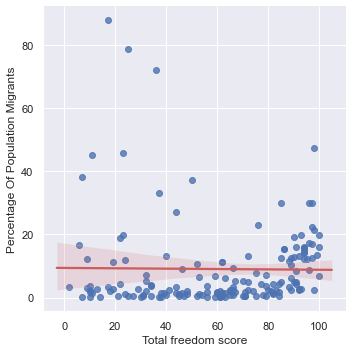

In [34]:
sns.lmplot(x="Total freedom score", y="Percentage Of Population Migrants",
           data=df, line_kws={'color':'indianred'});

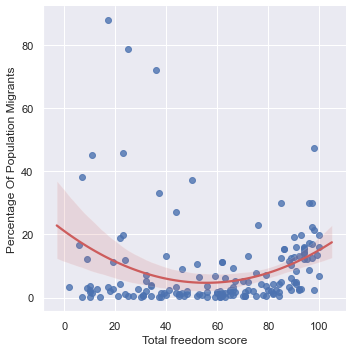

In [35]:
sns.lmplot(x="Total freedom score", y="Percentage Of Population Migrants",
           data=df, order=2, line_kws={'color':'indianred'});

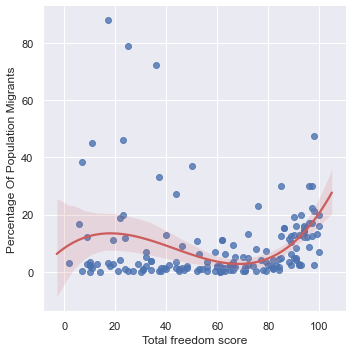

In [36]:
sns.lmplot(x="Total freedom score", y="Percentage Of Population Migrants",
           data=df, order=3, line_kws={'color':'indianred'});

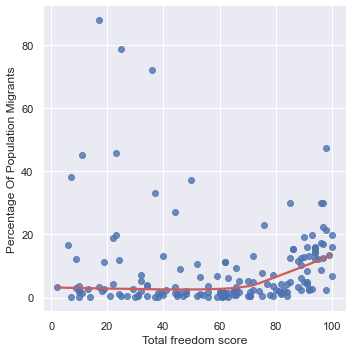

In [37]:
sns.lmplot(x="Total freedom score", y="Percentage Of Population Migrants",
           data=df, lowess=True, line_kws={'color':'indianred'});

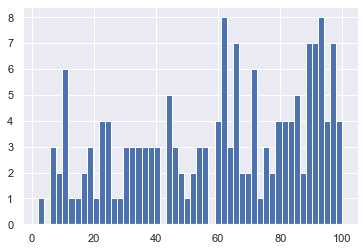

In [38]:
df["Total freedom score"].hist(bins=50)

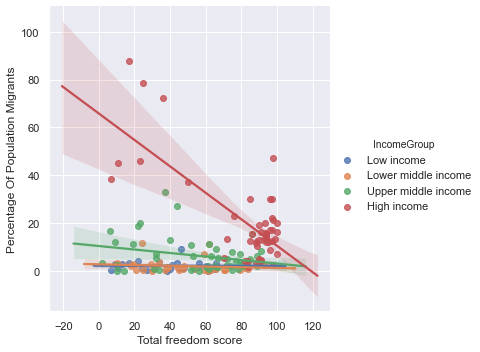

In [39]:
sns.lmplot(x="Total freedom score", y="Percentage Of Population Migrants", hue="IncomeGroup",
           data=df);

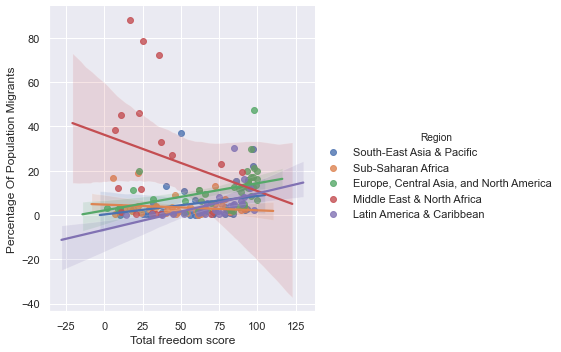

In [40]:
sns.lmplot(x="Total freedom score", y="Percentage Of Population Migrants", hue="Region",
           data=df);

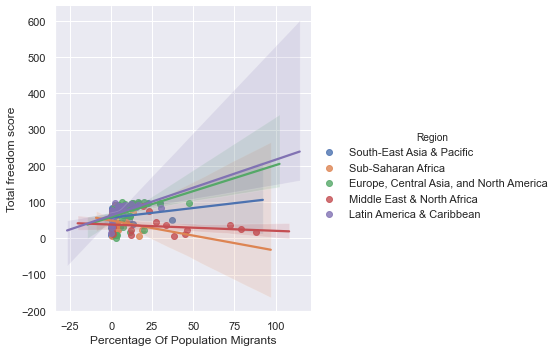

In [41]:
sns.lmplot(x="Percentage Of Population Migrants", y="Total freedom score", hue="Region",
           data=df);

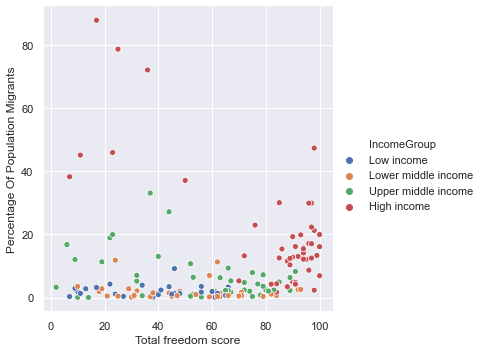

In [42]:
sns.relplot(x="Total freedom score", y="Percentage Of Population Migrants", hue="IncomeGroup",
           data=df);

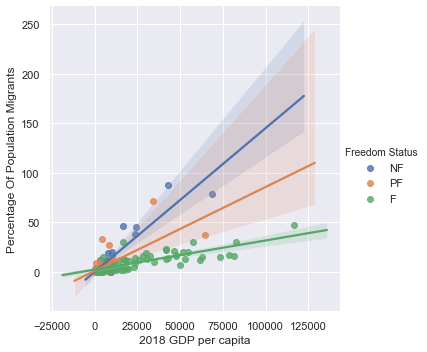

In [43]:
sns.lmplot(x="2018 GDP per capita", y="Percentage Of Population Migrants", hue="Freedom Status",
           data=df);

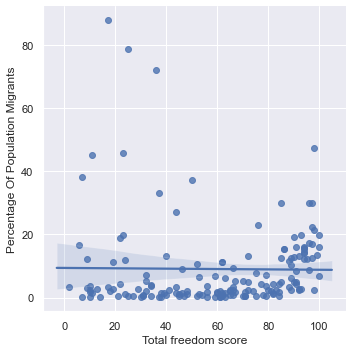

In [44]:
sns.lmplot(x="Total freedom score", y="Percentage Of Population Migrants",
           data=df);

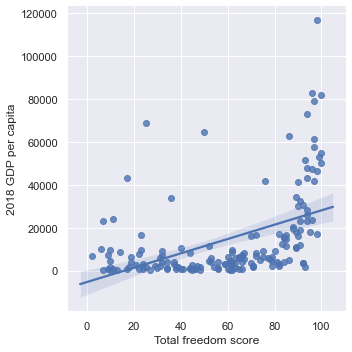

In [45]:
sns.lmplot(x="Total freedom score", y="2018 GDP per capita",
           data=df);

*******************************

Start of paper plots and modls

***********************************************************

This part shows why I changed the income group to 3 groups

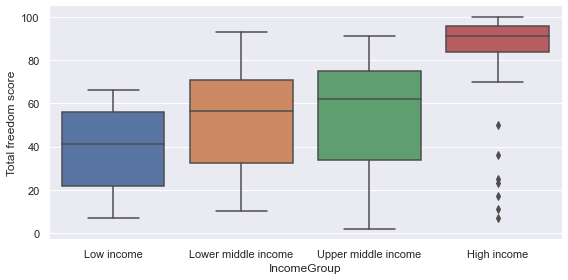

In [46]:
freedom_by_income = sns.catplot(x="IncomeGroup", y="Total freedom score",
            data=df, kind="box", height=4, aspect=2)


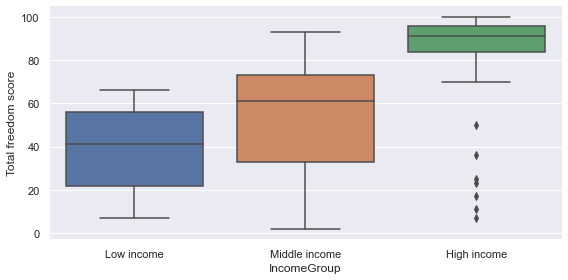

In [47]:
df['IncomeGroup'] = df['IncomeGroup'].replace("Lower middle income", "Middle income")
df['IncomeGroup'] = df['IncomeGroup'].replace("Upper middle income", "Middle income")
freedom_by_income = sns.catplot(x="IncomeGroup", y="Total freedom score",
            data=df, kind="box", height=4, aspect=2)

In [48]:
df = df.drop(columns=['Upper middle income', 'High income', 'Lower middle income', 'Low income'])
df['Income_Group'] = df['IncomeGroup']
df = pd.get_dummies(df, columns=['Income_Group'])


In [49]:
df.rename(columns={
                              "IncomeGroup ": "Income Group ",
                              "Income_Group_High income": "High income",
                              "Income_Group_Low income": "Low income",
                              "Income_Group_Middle income": "Middle income",
                  }, inplace=True)

Now I will check Migrants data

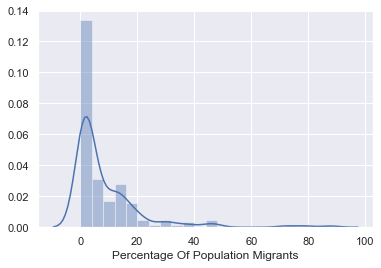

In [50]:
sns.distplot(df['Percentage Of Population Migrants']);

This is to check how areas are orginiazed

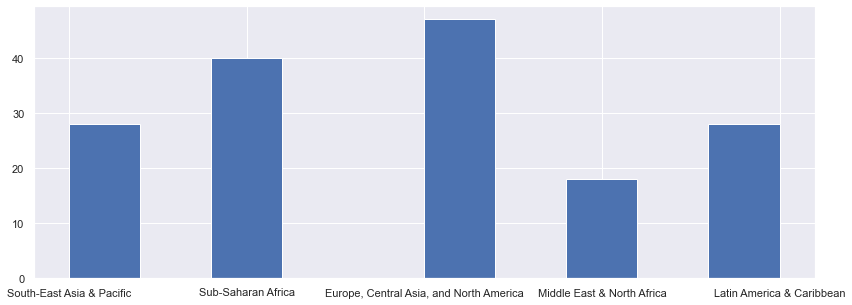

In [51]:
df["Region"].hist(figsize = (14, 5))

No to show a simple correlatin matrix with heat map - just to have a nice represintation

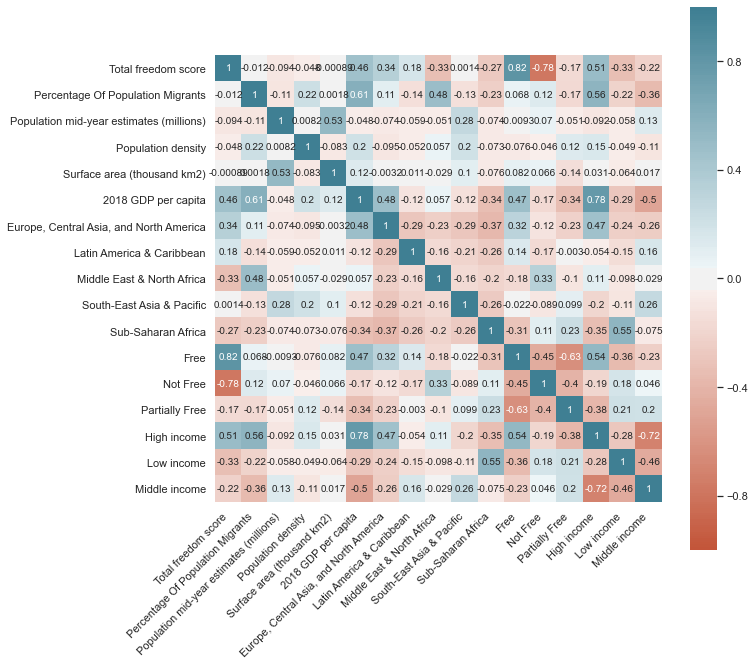

In [52]:
corr = df.corr(method ='pearson') 
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200), 
            square=True, annot=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45,  horizontalalignment='right')
plt.close()
fig

Now we run the regression
Regression 1 is the basic one just to see where we are

In [53]:
# model1 = full model with dumme for income
y = df["Percentage Of Population Migrants"]
x = df[["Total freedom score",
       "Population mid-year estimates (millions)",
       "Population density",
       "Surface area (thousand km2)",
       "High income",
       "Middle income",
       "South-East Asia & Pacific",
       "Latin America & Caribbean",
       "Middle East & North Africa",
       "Europe, Central Asia, and North America"]]
# "Sub-Saharan Africa" and "Low income" droped for multicollinearity
model1 = sm.OLS(endog=y, exog=sm.add_constant(x.astype(float))).fit()
model1.summary()

c:\users\hananel.livne\appdata\local\programs\python\python37-32\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                   
=============================================================================================
Dep. Variable:     Percentage Of Population Migrants   R-squared:                       0.553
Model:                                           OLS   Adj. R-squared:                  0.523
Method:                                Least Squares   F-statistic:                     18.54
Date:                               Thu, 18 Jun 2020   Prob (F-statistic):           8.95e-22
Time:                                       11:30:43   Log-Likelihood:                -584.64
No. Observations:                                161   AIC:                             1191.
Df Residuals:                                    150   BIC:                             1225.
Df Model:                                         10                                         
Covariance Type:                           nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                        6.1355      2.432      2.523      0.013       1.330      10.942
Total freedom score                         -0.1173      0.037     -3.174      0.002      -0.190      -0.044
Population mid-year estimates (millions)    -0.0083      0.006     -1.446      0.150      -0.020       0.003
Population density                           0.0017      0.001      1.430      0.155      -0.001       0.004
Surface area (thousand km2)                  0.0003      0.001      0.629      0.530      -0.001       0.001
High income                                 23.2592      3.484      6.677      0.000      16.376      30.142
Middle income                                4.3675      2.544      1.717      0.088      -0.660       9.395
South-East Asia & Pacific                    0.0357      2.671      0.013      0.989      -5.242       5.313
Latin America & Caribbean                   -2.0538      2.648     -0.776      0.439      -7.285       3.178
Middle East & North Africa                  12.4313      3.209      3.874      0.000       6.090      18.773
Europe, Central Asia, and North America     -2.5608      2.599     -0.985      0.326      -7.696       2.574
==============================================================================
Omnibus:                       76.643   Durbin-Watson:                   1.855
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              416.129
Skew:                           1.667   Prob(JB):                     4.35e-91
Kurtosis:                      10.135   Cond. No.                     1.23e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.23e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

At this point the data shows that demographics and size of are is not relevnt.
Therfore I will look at the data and attempt to remove problematic data.

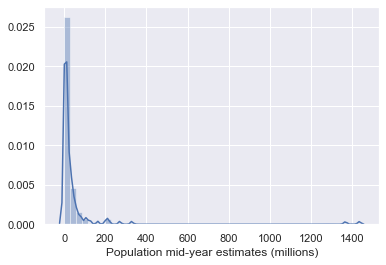

In [54]:
sns.distplot(df['Population mid-year estimates (millions)'])

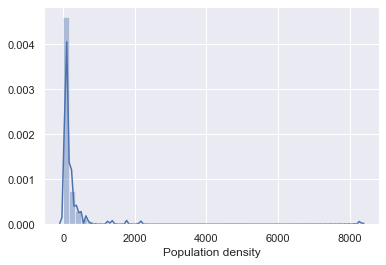

In [55]:
sns.distplot(df['Population density'])

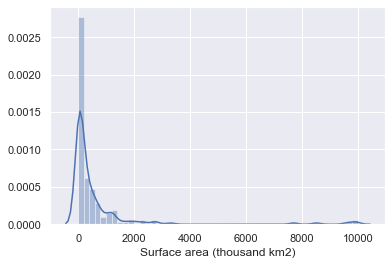

In [56]:
sns.distplot(df['Surface area (thousand km2)'])

Since ther are some extreame results I will remove them and rerun reg 1

In [57]:
df_clean_demographics = df.copy()

indexNames = df_clean_demographics[ df_clean_demographics["Population mid-year estimates (millions)"] > 400 ].index
df_clean_demographics.drop(indexNames , inplace=True)

indexNames = df_clean_demographics[ df_clean_demographics["Population density"] > 3000 ].index
df_clean_demographics.drop(indexNames , inplace=True)

indexNames = df_clean_demographics[ df_clean_demographics["Surface area (thousand km2)"] > 1500 ].index
df_clean_demographics.drop(indexNames , inplace=True)


In [58]:
# model2 = full model with dumme for income
y = df_clean_demographics["Percentage Of Population Migrants"]
x = df_clean_demographics[["Total freedom score",
       "Population mid-year estimates (millions)",
       "Population density",
       "Surface area (thousand km2)",
       "High income",
       "Middle income",
       "South-East Asia & Pacific",
       "Latin America & Caribbean",
       "Middle East & North Africa",
       "Europe, Central Asia, and North America"]]
# "Sub-Saharan Africa" and "Low income" droped for multicollinearity
model2 = sm.OLS(endog=y, exog=sm.add_constant(x.astype(float))).fit()
model2.summary()

c:\users\hananel.livne\appdata\local\programs\python\python37-32\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                   
=============================================================================================
Dep. Variable:     Percentage Of Population Migrants   R-squared:                       0.559
Model:                                           OLS   Adj. R-squared:                  0.526
Method:                                Least Squares   F-statistic:                     17.12
Date:                               Thu, 18 Jun 2020   Prob (F-statistic):           1.01e-19
Time:                                       11:30:45   Log-Likelihood:                -528.74
No. Observations:                                146   AIC:                             1079.
Df Residuals:                                    135   BIC:                             1112.
Df Model:                                         10                                         
Covariance Type:                           nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                        9.3900      2.895      3.243      0.001       3.664      15.116
Total freedom score                         -0.1357      0.039     -3.443      0.001      -0.214      -0.058
Population mid-year estimates (millions)    -0.0386      0.029     -1.350      0.179      -0.095       0.018
Population density                        6.951e-05      0.003      0.022      0.982      -0.006       0.006
Surface area (thousand km2)                 -0.0036      0.003     -1.200      0.232      -0.009       0.002
High income                                 23.2045      3.574      6.493      0.000      16.137      30.272
Middle income                                4.7742      2.543      1.877      0.063      -0.255       9.804
South-East Asia & Pacific                   -0.8148      2.831     -0.288      0.774      -6.413       4.783
Latin America & Caribbean                   -3.0000      2.726     -1.100      0.273      -8.392       2.392
Middle East & North Africa                  13.8231      3.423      4.039      0.000       7.054      20.592
Europe, Central Asia, and North America     -3.4583      2.701     -1.280      0.203      -8.800       1.883
==============================================================================
Omnibus:                       58.717   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              254.224
Skew:                           1.403   Prob(JB):                     6.25e-56
Kurtosis:                       8.824   Cond. No.                     3.05e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.05e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Results show no change. Thefore we will remove them, and run with GDP

In [59]:
# model3 = full model with dumme for income
y = df["Percentage Of Population Migrants"]
x = df[["Total freedom score",
       "High income",
       "Middle income",
       "South-East Asia & Pacific",
       "Latin America & Caribbean",
       "Middle East & North Africa",
       "Europe, Central Asia, and North America"]]
# "Sub-Saharan Africa" and "Low income" droped for multicollinearity
model3 = sm.OLS(endog=y, exog=sm.add_constant(x.astype(float))).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                   
=============================================================================================
Dep. Variable:     Percentage Of Population Migrants   R-squared:                       0.540
Model:                                           OLS   Adj. R-squared:                  0.519
Method:                                Least Squares   F-statistic:                     25.69
Date:                               Thu, 18 Jun 2020   Prob (F-statistic):           5.45e-23
Time:                                       11:30:45   Log-Likelihood:                -586.87
No. Observations:                                161   AIC:                             1190.
Df Residuals:                                    153   BIC:                             1214.
Df Model:                                          7                                         
Covariance Type:                           nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                       6.4578      2.393      2.699      0.008       1.730      11.185
Total freedom score                        -0.1201      0.036     -3.309      0.001      -0.192      -0.048
High income                                24.1533      3.403      7.097      0.000      17.430      30.877
Middle income                               4.2784      2.547      1.680      0.095      -0.754       9.311
South-East Asia & Pacific                  -0.0814      2.577     -0.032      0.975      -5.173       5.010
Latin America & Caribbean                  -2.0630      2.656     -0.777      0.439      -7.310       3.184
Middle East & North Africa                 12.4013      3.214      3.859      0.000       6.052      18.751
Europe, Central Asia, and North America    -3.0117      2.594     -1.161      0.247      -8.136       2.112
==============================================================================
Omnibus:                       67.526   Durbin-Watson:                   1.806
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              307.971
Skew:                           1.498   Prob(JB):                     1.33e-67
Kurtosis:                       9.078   Cond. No.                         462.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
# model4 = full model with GDP for income
y = df["Percentage Of Population Migrants"]
x = df[["Total freedom score",
       "2018 GDP per capita",
       "South-East Asia & Pacific",
       "Latin America & Caribbean",
       "Middle East & North Africa",
       "Europe, Central Asia, and North America"]]
# "Sub-Saharan Africa" and "Low income" droped for multicollinearity
model4 = sm.OLS(endog=y, exog=sm.add_constant(x.astype(float))).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                   
=============================================================================================
Dep. Variable:     Percentage Of Population Migrants   R-squared:                       0.606
Model:                                           OLS   Adj. R-squared:                  0.591
Method:                                Least Squares   F-statistic:                     39.47
Date:                               Thu, 18 Jun 2020   Prob (F-statistic):           8.26e-29
Time:                                       11:30:45   Log-Likelihood:                -574.46
No. Observations:                                161   AIC:                             1163.
Df Residuals:                                    154   BIC:                             1184.
Df Model:                                          6                                         
Covariance Type:                           nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                       6.7270      1.978      3.402      0.001       2.820      10.634
Total freedom score                        -0.0970      0.031     -3.095      0.002      -0.159      -0.035
2018 GDP per capita                         0.0005   4.39e-05     11.044      0.000       0.000       0.001
South-East Asia & Pacific                  -0.1498      2.198     -0.068      0.946      -4.492       4.193
Latin America & Caribbean                   0.4961      2.270      0.219      0.827      -3.988       4.980
Middle East & North Africa                 15.4959      2.655      5.838      0.000      10.252      20.740
Europe, Central Asia, and North America    -2.6980      2.212     -1.220      0.224      -7.068       1.672
==============================================================================
Omnibus:                       63.533   Durbin-Watson:                   1.712
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              387.523
Skew:                           1.274   Prob(JB):                     7.09e-85
Kurtosis:                      10.161   Cond. No.                     1.32e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Coutries with more then 25% imigration seems to be imigration coutries, with a higher ratio of 1:3 imegrant per citizens. Therfore they will be removed. 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                   
=============================================================================================
Dep. Variable:     Percentage Of Population Migrants   R-squared:                       0.577
Model:                                           OLS   Adj. R-squared:                  0.547
Method:                                Least Squares   F-statistic:                     19.11
Date:                               Thu, 18 Jun 2020   Prob (F-statistic):           8.31e-20
Time:                                       11:30:47   Log-Likelihood:                -374.46
No. Observations:                                136   AIC:                             768.9
Df Residuals:                                    126   BIC:                             798.0
Df Model:                                          9                                         
Covariance Type:                           nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                        3.3669      1.192      2.824      0.006       1.008       5.726
Total freedom score                         -0.0039      0.017     -0.234      0.815      -0.037       0.029
Population mid-year estimates (millions)    -0.0187      0.012     -1.526      0.130      -0.043       0.006
Population density                           0.0032      0.002      1.938      0.055   -6.64e-05       0.006
Surface area (thousand km2)                 -0.0007      0.001     -0.507      0.613      -0.003       0.002
2018 GDP per capita                          0.0002   2.94e-05      8.238      0.000       0.000       0.000
South-East Asia & Pacific                   -0.8421      1.123     -0.750      0.455      -3.064       1.380
Latin America & Caribbean                   -1.1095      1.076     -1.031      0.304      -3.238       1.019
Middle East & North Africa                   1.1303      1.569      0.720      0.473      -1.975       4.235
Europe, Central Asia, and North America      0.1794      1.097      0.164      0.870      -1.991       2.350
==============================================================================
Omnibus:                       26.295   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.816
Skew:                           1.056   Prob(JB):                     1.67e-08
Kurtosis:                       4.365   Cond. No.                     1.14e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.14e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

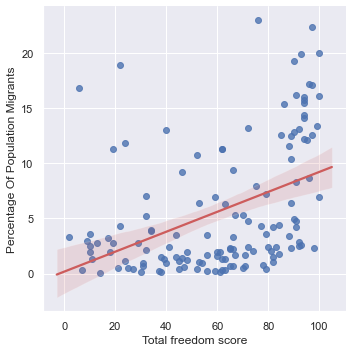

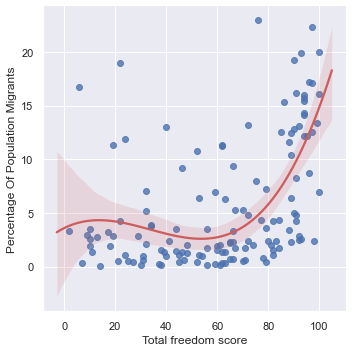

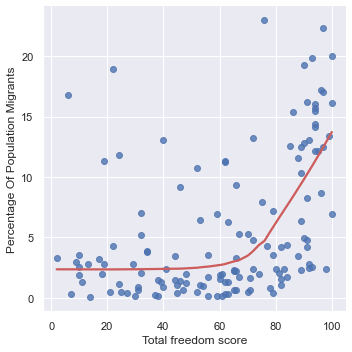

In [61]:
# model5 =  model only of coutries with less then 25% imigration
df_less_then_25_percent_Migrants = df_clean_demographics.copy()
indexNames = df_less_then_25_percent_Migrants[ df_less_then_25_percent_Migrants['Percentage Of Population Migrants'] > 25 ].index
df_less_then_25_percent_Migrants.drop(indexNames , inplace=True)
y = df_less_then_25_percent_Migrants["Percentage Of Population Migrants"]
x = df_less_then_25_percent_Migrants[["Total freedom score",
       "Population mid-year estimates (millions)",
       "Population density",
       "Surface area (thousand km2)",
       "2018 GDP per capita",
       "South-East Asia & Pacific",
       "Latin America & Caribbean",
       "Middle East & North Africa",
       "Europe, Central Asia, and North America"]]
model5 = sm.OLS(endog=y, exog=sm.add_constant(x.astype(float))).fit()

# plotting model 5 for paper
sns.lmplot(x="Total freedom score", y="Percentage Of Population Migrants",
           data=df_less_then_25_percent_Migrants, line_kws={'color':'indianred'});
sns.lmplot(x="Total freedom score", y="Percentage Of Population Migrants",
           data=df_less_then_25_percent_Migrants, order=3, line_kws={'color':'indianred'});
sns.lmplot(x="Total freedom score", y="Percentage Of Population Migrants",
           data=df_less_then_25_percent_Migrants, lowess=True, line_kws={'color':'indianred'});

model5.summary()

As we can see from model 5 removing contries with more then 25% migrants turn MENA to not statistical valuable.
Therfore I will attempt to
1. remove all regions
2. check regions

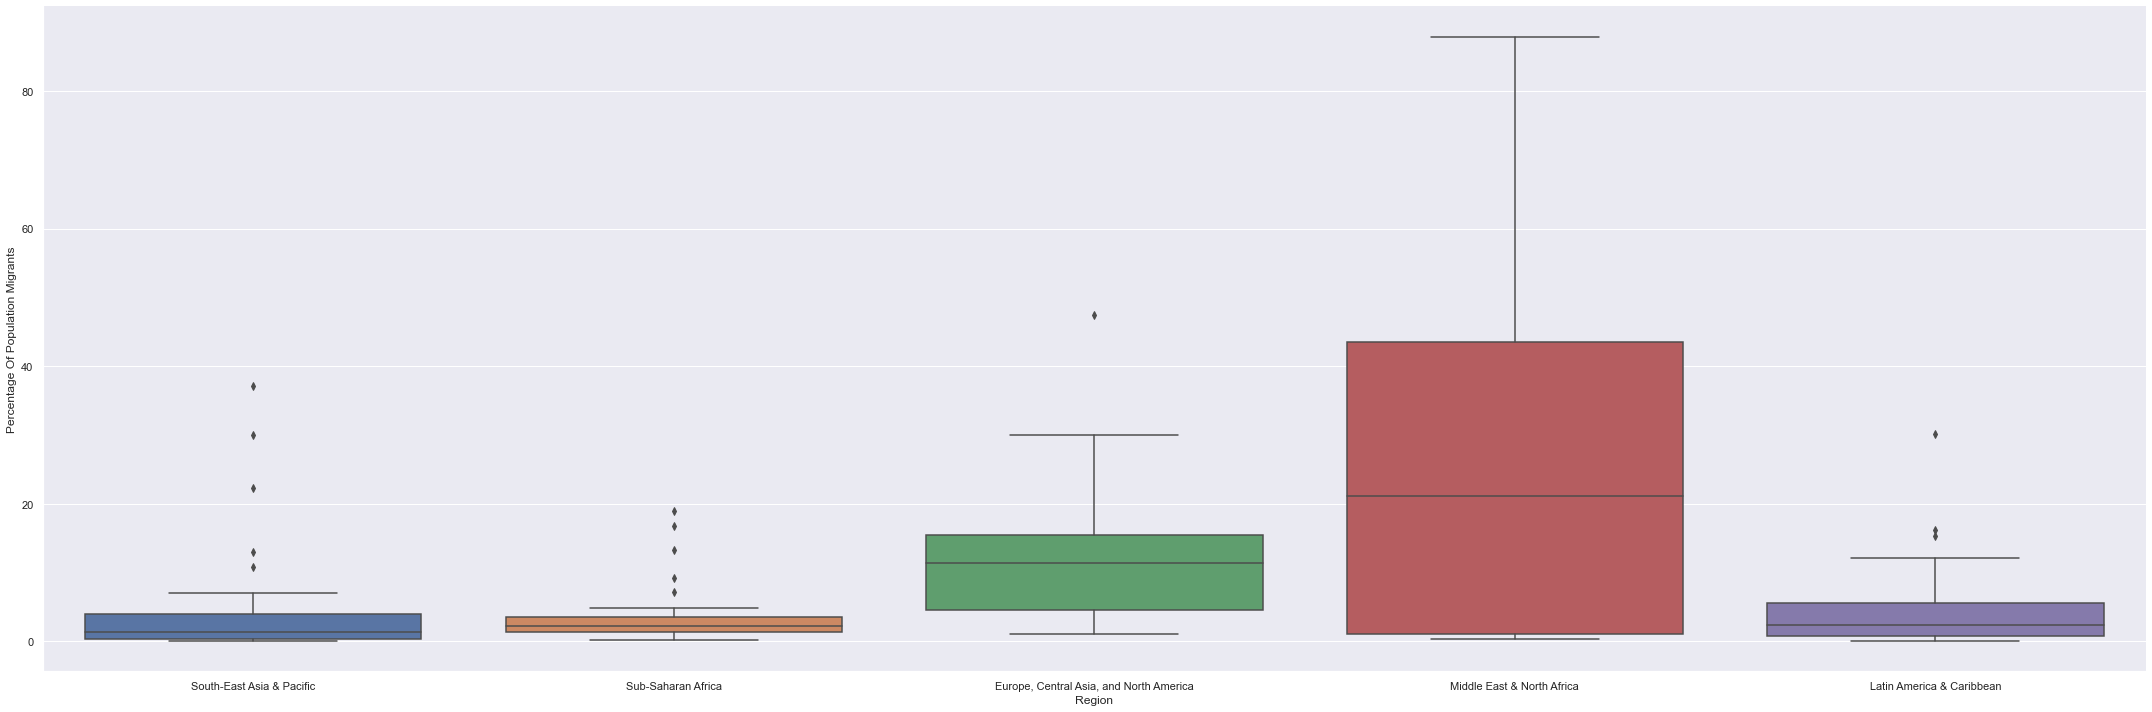

In [62]:
sns.catplot(x="Region", y="Percentage Of Population Migrants",
            data=df, kind="box", height=10, aspect=3)

In [63]:
multicomp = MultiComparison(df['Total freedom score'], df['Region'])
print(multicomp.tukeyhsd().summary())

                            Multiple Comparison of Means - Tukey HSD, FWER=0.05                            
                 group1                           group2           meandiff p-adj   lower    upper   reject
-----------------------------------------------------------------------------------------------------------
Europe, Central Asia, and North America  Latin America & Caribbean  -4.2918    0.9 -20.5924  12.0088  False
Europe, Central Asia, and North America Middle East & North Africa -41.6489  0.001 -60.5755 -22.7224   True
Europe, Central Asia, and North America  South-East Asia & Pacific -15.0775 0.0847 -31.3781   1.2231  False
Europe, Central Asia, and North America         Sub-Saharan Africa -28.7239  0.001 -43.4125 -14.0353   True
              Latin America & Caribbean Middle East & North Africa -37.3571  0.001 -57.9855 -16.7288   True
              Latin America & Caribbean  South-East Asia & Pacific -10.7857 0.4804 -29.0346   7.4632  False
              Latin America 

As we can see - region is not of any effect and should be removed.

c:\users\hananel.livne\appdata\local\programs\python\python37-32\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                   
=============================================================================================
Dep. Variable:     Percentage Of Population Migrants   R-squared:                       0.583
Model:                                           OLS   Adj. R-squared:                  0.542
Method:                                Least Squares   F-statistic:                     14.26
Date:                               Thu, 18 Jun 2020   Prob (F-statistic):           9.95e-09
Time:                                       11:30:49   Log-Likelihood:                -162.62
No. Observations:                                 57   AIC:                             337.2
Df Residuals:                                     51   BIC:                             349.5
Df Model:                                          5                                         
Covariance Type:                           nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.3603      8.383     -0.162      0.872     -18.190      15.470
Total freedom score                          0.0486      0.101      0.482      0.632      -0.154       0.251
Population mid-year estimates (millions)    -0.0030      0.037     -0.081      0.936      -0.077       0.071
Population density                           0.0050      0.003      1.770      0.083      -0.001       0.011
Surface area (thousand km2)                  0.0002      0.003      0.056      0.956      -0.005       0.006
2018 GDP per capita                          0.0002    3.9e-05      5.552      0.000       0.000       0.000
==============================================================================
Omnibus:                        5.258   Durbin-Watson:                   2.175
Prob(Omnibus):                  0.072   Jarque-Bera (JB):                4.944
Skew:                           0.721   Prob(JB):                       0.0844
Kurtosis:                       2.955   Cond. No.                     4.48e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.48e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

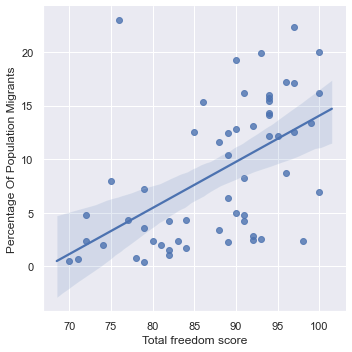

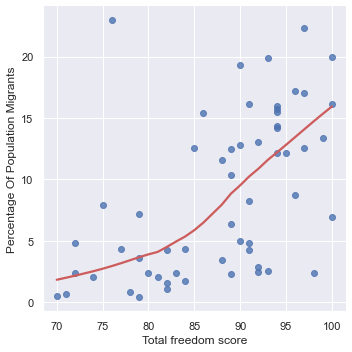

In [64]:
# model6 =  model only of coutries that are free
df_free = df_less_then_25_percent_Migrants.copy()
indexNames = df_free[ df_free["Freedom Status"] != 'F' ].index
df_free.drop(indexNames , inplace=True)
y = df_free["Percentage Of Population Migrants"]
x = df_free[["Total freedom score",
       "Population mid-year estimates (millions)",
       "Population density",
       "Surface area (thousand km2)",
       "2018 GDP per capita"]]
model6 = sm.OLS(endog=y, exog=sm.add_constant(x.astype(float))).fit()

# plotting model6 for paper
sns.lmplot(x="Total freedom score", y="Percentage Of Population Migrants",
           data=df_free);
sns.lmplot(x="Total freedom score", y="Percentage Of Population Migrants",
           data=df_free, lowess=True, line_kws={'color':'indianred'});

model6.summary()

In [65]:
# model7 =  removed all demographics
y = df_free["Percentage Of Population Migrants"]
x = df_free[["Total freedom score",
       "Surface area (thousand km2)",
       "2018 GDP per capita"]]
model7 = sm.OLS(endog=y, exog=sm.add_constant(x.astype(float))).fit()

model7.summary()

c:\users\hananel.livne\appdata\local\programs\python\python37-32\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                   
=============================================================================================
Dep. Variable:     Percentage Of Population Migrants   R-squared:                       0.557
Model:                                           OLS   Adj. R-squared:                  0.532
Method:                                Least Squares   F-statistic:                     22.21
Date:                               Thu, 18 Jun 2020   Prob (F-statistic):           1.90e-09
Time:                                       11:30:49   Log-Likelihood:                -164.35
No. Observations:                                 57   AIC:                             336.7
Df Residuals:                                     53   BIC:                             344.9
Df Model:                                          3                                         
Covariance Type:                           nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -1.1667      8.457     -0.138      0.891     -18.130      15.797
Total freedom score             0.0567      0.102      0.558      0.579      -0.147       0.260
Surface area (thousand km2)    -0.0010      0.002     -0.432      0.668      -0.005       0.004
2018 GDP per capita             0.0002   3.92e-05      5.571      0.000       0.000       0.000
==============================================================================
Omnibus:                        4.426   Durbin-Watson:                   2.161
Prob(Omnibus):                  0.109   Jarque-Bera (JB):                4.257
Skew:                           0.661   Prob(JB):                        0.119
Kurtosis:                       2.789   Cond. No.                     4.47e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.47e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [66]:
df_free["Total freedom score * 2018 GDP per capita"] = df_free["Total freedom score"] * df_free["2018 GDP per capita"]


<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                   
=============================================================================================
Dep. Variable:     Percentage Of Population Migrants   R-squared:                       0.639
Model:                                           OLS   Adj. R-squared:                  0.611
Method:                                Least Squares   F-statistic:                     23.02
Date:                               Thu, 18 Jun 2020   Prob (F-statistic):           5.47e-11
Time:                                       11:30:50   Log-Likelihood:                -158.50
No. Observations:                                 57   AIC:                             327.0
Df Residuals:                                     52   BIC:                             337.2
Df Model:                                          4                                         
Covariance Type:                           nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                       -18.6797      9.236     -2.022      0.048     -37.214      -0.146
Total freedom score                           0.2460      0.108      2.285      0.026       0.030       0.462
Surface area (thousand km2)                   0.0002      0.002      0.076      0.940      -0.004       0.004
2018 GDP per capita                           0.0016      0.000      3.955      0.000       0.001       0.002
Total freedom score * 2018 GDP per capita -1.498e-05   4.36e-06     -3.440      0.001   -2.37e-05   -6.24e-06
==============================================================================
Omnibus:                        4.127   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.127   Jarque-Bera (JB):                3.539
Skew:                           0.609   Prob(JB):                        0.170
Kurtosis:                       3.091   Cond. No.                     5.08e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.08e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

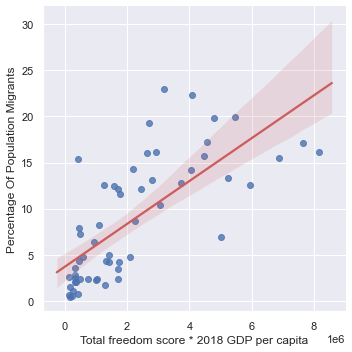

In [67]:
# model8 =  add interaction for freedome and GDP
y = df_free["Percentage Of Population Migrants"]
x = df_free[["Total freedom score",
       "Surface area (thousand km2)",
       "2018 GDP per capita",
            "Total freedom score * 2018 GDP per capita"]]
model8 = sm.OLS(endog=y, exog=sm.add_constant(x.astype(float))).fit()

# plotting model8 for paper
sns.lmplot(x="Total freedom score * 2018 GDP per capita", y="Percentage Of Population Migrants",
           data=df_free, line_kws={'color':'indianred'});

model8.summary()

c:\users\hananel.livne\appdata\local\programs\python\python37-32\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                   
=============================================================================================
Dep. Variable:     Percentage Of Population Migrants   R-squared:                       0.394
Model:                                           OLS   Adj. R-squared:                  0.356
Method:                                Least Squares   F-statistic:                     10.39
Date:                               Thu, 18 Jun 2020   Prob (F-statistic):           2.20e-05
Time:                                       12:32:41   Log-Likelihood:                -126.92
No. Observations:                                 52   AIC:                             261.8
Df Residuals:                                     48   BIC:                             269.6
Df Model:                                          3                                         
Covariance Type:                           nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           3.3305      2.164      1.539      0.130      -1.021       7.682
Total freedom score            -0.0388      0.039     -0.999      0.323      -0.117       0.039
Surface area (thousand km2)    -0.0009      0.001     -0.756      0.454      -0.003       0.001
2018 GDP per capita             0.0006      0.000      5.206      0.000       0.000       0.001
==============================================================================
Omnibus:                       11.684   Durbin-Watson:                   1.703
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               11.799
Skew:                           1.008   Prob(JB):                      0.00274
Kurtosis:                       4.175   Cond. No.                     2.87e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.87e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

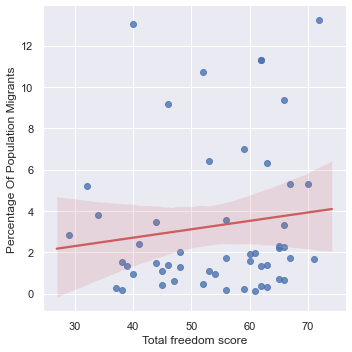

In [86]:
# model9 =  PF
df_pf = df_less_then_25_percent_Migrants.copy()
indexNames = df_pf[ df_pf["Freedom Status"] != 'PF' ].index
df_pf.drop(indexNames , inplace=True)
df_pf["Total freedom score * 2018 GDP per capita"] = df_pf["Total freedom score"] * df_pf["2018 GDP per capita"]

y = df_pf["Percentage Of Population Migrants"]
x = df_pf[["Total freedom score",
       "Surface area (thousand km2)",
       "2018 GDP per capita"]]
model9 = sm.OLS(endog=y, exog=sm.add_constant(x.astype(float))).fit()

# plotting model9 for paper
sns.lmplot(x="Total freedom score", y="Percentage Of Population Migrants",
           data=df_pf, line_kws={'color':'indianred'});


model9.summary()

c:\users\hananel.livne\appdata\local\programs\python\python37-32\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                   
=============================================================================================
Dep. Variable:     Percentage Of Population Migrants   R-squared:                       0.403
Model:                                           OLS   Adj. R-squared:                  0.352
Method:                                Least Squares   F-statistic:                     7.930
Date:                               Thu, 18 Jun 2020   Prob (F-statistic):           5.71e-05
Time:                                       12:32:46   Log-Likelihood:                -126.53
No. Observations:                                 52   AIC:                             263.1
Df Residuals:                                     47   BIC:                             272.8
Df Model:                                          4                                         
Covariance Type:                           nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                         1.5901      2.987      0.532      0.597      -4.420       7.600
Total freedom score                          -0.0089      0.053     -0.170      0.866      -0.115       0.097
Surface area (thousand km2)                  -0.0008      0.001     -0.646      0.521      -0.003       0.002
2018 GDP per capita                           0.0011      0.001      1.877      0.067   -7.89e-05       0.002
Total freedom score * 2018 GDP per capita -7.968e-06    9.4e-06     -0.848      0.401   -2.69e-05    1.09e-05
==============================================================================
Omnibus:                       11.682   Durbin-Watson:                   1.719
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               11.757
Skew:                           1.019   Prob(JB):                      0.00280
Kurtosis:                       4.129   Cond. No.                     2.46e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.46e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

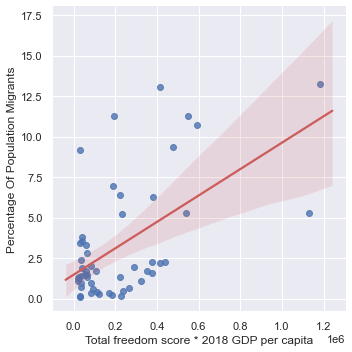

In [87]:
# model10 =  PF

y = df_pf["Percentage Of Population Migrants"]
x = df_pf[["Total freedom score",
       "Surface area (thousand km2)",
       "2018 GDP per capita",
            "Total freedom score * 2018 GDP per capita"]]
model10 = sm.OLS(endog=y, exog=sm.add_constant(x.astype(float))).fit()

# plotting model10 for paper
sns.lmplot(x="Total freedom score * 2018 GDP per capita", y="Percentage Of Population Migrants",
           data=df_pf, line_kws={'color':'indianred'});

model10.summary()

c:\users\hananel.livne\appdata\local\programs\python\python37-32\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                   
=============================================================================================
Dep. Variable:     Percentage Of Population Migrants   R-squared:                       0.371
Model:                                           OLS   Adj. R-squared:                  0.289
Method:                                Least Squares   F-statistic:                     4.520
Date:                               Thu, 18 Jun 2020   Prob (F-statistic):             0.0124
Time:                                       11:30:52   Log-Likelihood:                -74.968
No. Observations:                                 27   AIC:                             157.9
Df Residuals:                                     23   BIC:                             163.1
Df Model:                                          3                                         
Covariance Type:                           nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           2.4055      2.289      1.051      0.304      -2.329       7.140
Total freedom score            -0.0026      0.092     -0.028      0.978      -0.192       0.187
Surface area (thousand km2)    -0.0026      0.002     -1.156      0.259      -0.007       0.002
2018 GDP per capita             0.0008      0.000      3.140      0.005       0.000       0.001
==============================================================================
Omnibus:                        3.870   Durbin-Watson:                   2.079
Prob(Omnibus):                  0.144   Jarque-Bera (JB):                2.340
Skew:                           0.406   Prob(JB):                        0.310
Kurtosis:                       4.191   Cond. No.                     1.27e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.27e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

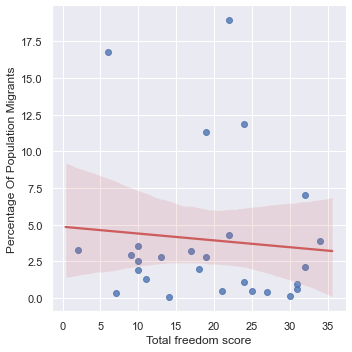

In [70]:
# model11 =  NF
df_nf = df_less_then_25_percent_Migrants.copy()
indexNames = df_nf[ df_nf["Freedom Status"] != 'NF' ].index
df_nf.drop(indexNames , inplace=True)
df_nf["Total freedom score * 2018 GDP per capita"] = df_nf["Total freedom score"] * df_nf["2018 GDP per capita"]

y = df_nf["Percentage Of Population Migrants"]
x = df_nf[["Total freedom score",
       "Surface area (thousand km2)",
       "2018 GDP per capita"]]
model11 = sm.OLS(endog=y, exog=sm.add_constant(x.astype(float))).fit()

# plotting model11 for paper
sns.lmplot(x="Total freedom score", y="Percentage Of Population Migrants",
           data=df_nf, line_kws={'color':'indianred'});

model11.summary()

c:\users\hananel.livne\appdata\local\programs\python\python37-32\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                   
=============================================================================================
Dep. Variable:     Percentage Of Population Migrants   R-squared:                       0.371
Model:                                           OLS   Adj. R-squared:                  0.257
Method:                                Least Squares   F-statistic:                     3.243
Date:                               Thu, 18 Jun 2020   Prob (F-statistic):             0.0310
Time:                                       11:30:52   Log-Likelihood:                -74.967
No. Observations:                                 27   AIC:                             159.9
Df Residuals:                                     22   BIC:                             166.4
Df Model:                                          4                                         
Covariance Type:                           nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                         2.3283      3.113      0.748      0.462      -4.127       8.784
Total freedom score                           0.0012      0.138      0.009      0.993      -0.286       0.288
Surface area (thousand km2)                  -0.0026      0.002     -1.106      0.281      -0.007       0.002
2018 GDP per capita                           0.0009      0.001      1.554      0.135      -0.000       0.002
Total freedom score * 2018 GDP per capita -1.035e-06   2.75e-05     -0.038      0.970   -5.81e-05     5.6e-05
==============================================================================
Omnibus:                        3.912   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.141   Jarque-Bera (JB):                2.386
Skew:                           0.406   Prob(JB):                        0.303
Kurtosis:                       4.209   Cond. No.                     3.44e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.44e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

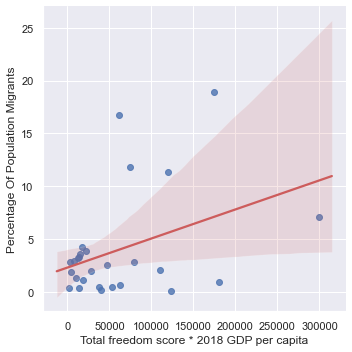

In [71]:
# model12 =  NF

y = df_nf["Percentage Of Population Migrants"]
x = df_nf[["Total freedom score",
       "Surface area (thousand km2)",
       "2018 GDP per capita",
            "Total freedom score * 2018 GDP per capita"]]
model12 = sm.OLS(endog=y, exog=sm.add_constant(x.astype(float))).fit()

# plotting model12 for paper
sns.lmplot(x="Total freedom score * 2018 GDP per capita", y="Percentage Of Population Migrants",
           data=df_nf, line_kws={'color':'indianred'});

model12.summary()

In [88]:
stargazer1 = Stargazer([model1, model2, model3, model4, model5, model6])
stargazer1.custom_columns(['Model 1', 'Model 2', 'Model 3', 'Model 4','Model 5', 'Model 6'], 
                         [1, 1, 1, 1, 1, 1])
stargazer1.covariate_order(['Total freedom score', 
                           '2018 GDP per capita',
                           'High income', 
                           'Middle income',
                           'Middle East & North Africa',
                           'Europe, Central Asia, and North America',
                           'South-East Asia & Pacific',
                           'Latin America & Caribbean',
                           'Surface area (thousand km2)',
                           'Population mid-year estimates (millions)',
                           'Population density',
                           'const'
                          ])

#model.summary()
HTML(stargazer1.render_html())

stargazer2 = Stargazer([model7, model8, model9, model10, model11, model12])
stargazer2.custom_columns(['Model 7', 'Model 8', 'Model 9', 'Model 10', 'Model 11', 'Model 12'], 
                         [1, 1, 1, 1, 1, 1])
stargazer2.covariate_order(['Total freedom score', 
                           '2018 GDP per capita',
                           'Total freedom score * 2018 GDP per capita',
                           'Surface area (thousand km2)',
                           'const'
                          ])

#model.summary()
HTML(stargazer2.render_html())

For export:

In [89]:
Html_file= open("final1.html","w")
Html_file.write(stargazer1.render_html())
Html_file.close()

Html_file= open("final2.html","w")
Html_file.write(stargazer2.render_html())
Html_file.close()

df.describe(include='all')
df.describe(include='all').to_csv("df_description.csv")

df.to_excel(r'df.xlsx', index = False)

More plots for further research

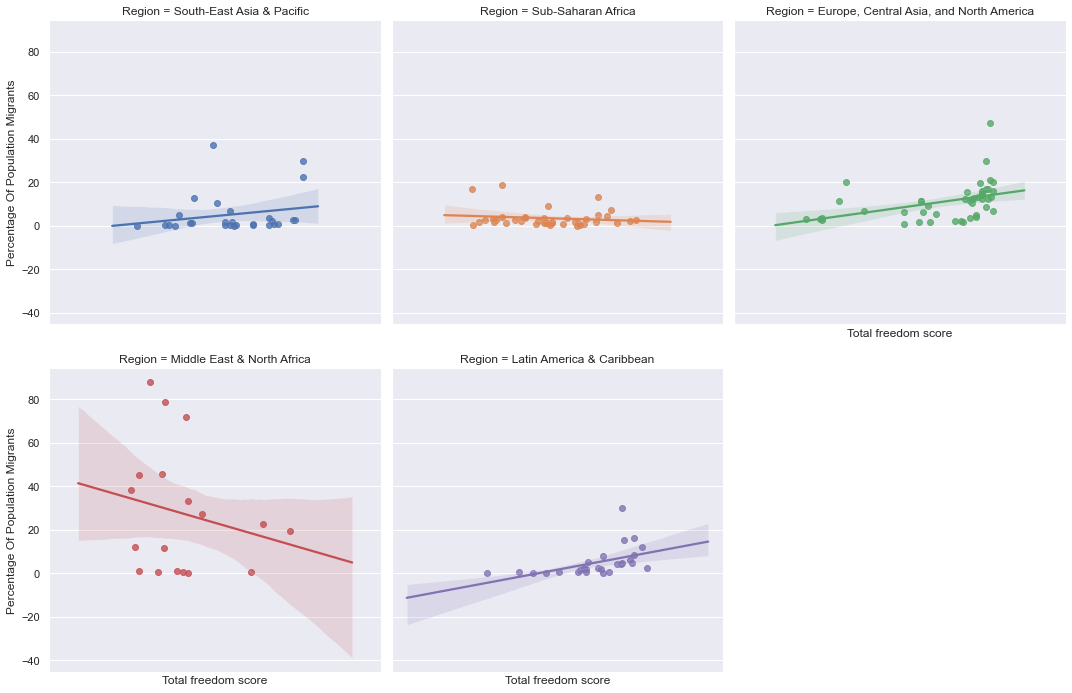

In [93]:
g = sns.lmplot(y="Percentage Of Population Migrants", x="Total freedom score", hue="Region", col="Region", col_wrap=3,  
           data=df);
g.set(xticks=[])

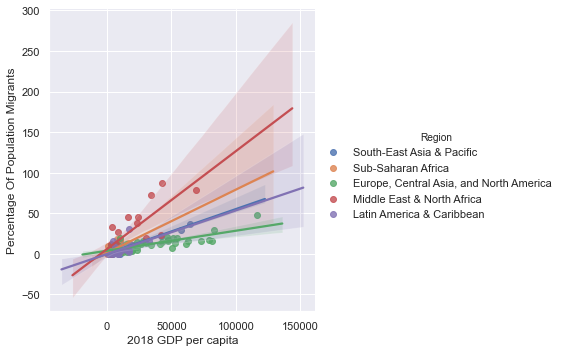

In [90]:
# consider relplot if you don't want the reg line
sns.lmplot(x="2018 GDP per capita", y="Percentage Of Population Migrants", hue="Region",
           data=df);

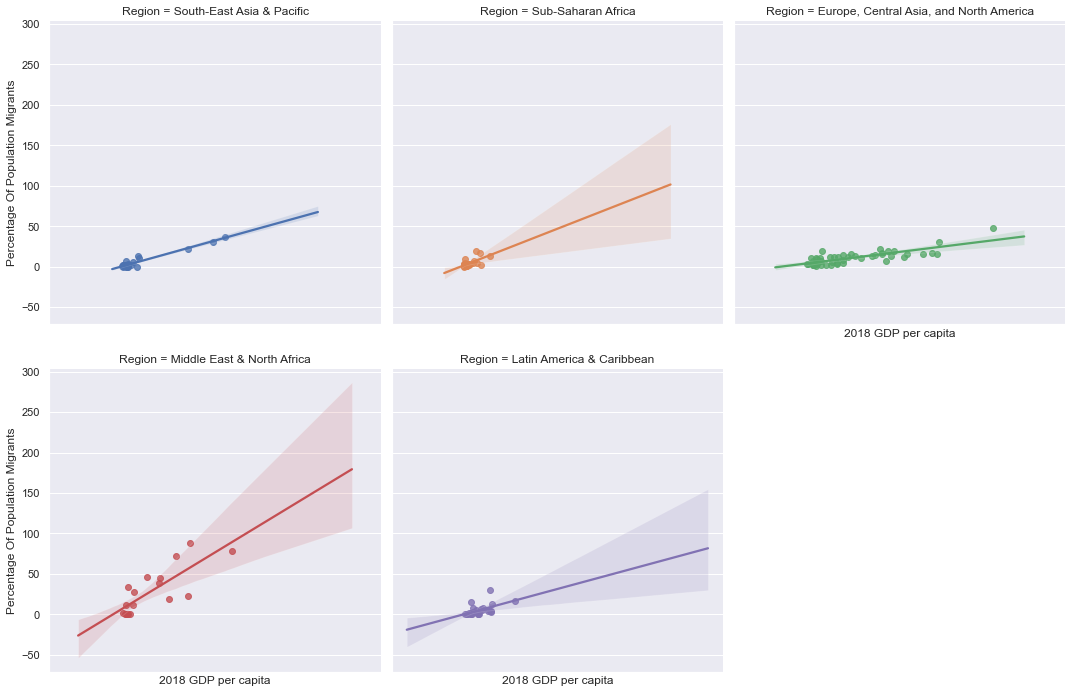

In [92]:
g = sns.lmplot(y="Percentage Of Population Migrants", x="2018 GDP per capita", hue="Region", col="Region", col_wrap=3,  
           data=df);
g.set(xticks=[])

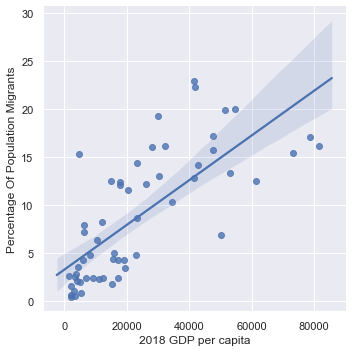

In [78]:
sns.lmplot(y="Percentage Of Population Migrants", x="2018 GDP per capita", 
           data=df_free);

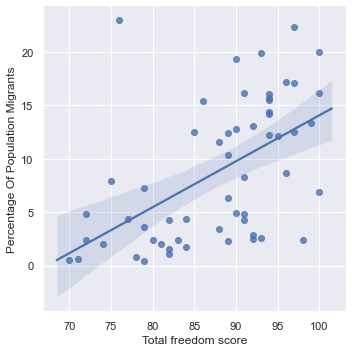

In [79]:
sns.lmplot(y="Percentage Of Population Migrants", x="Total freedom score", 
           data=df_free);

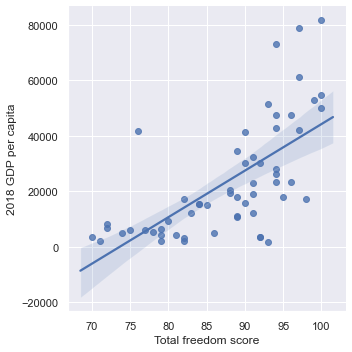

In [80]:
sns.lmplot(y="2018 GDP per capita", x="Total freedom score", 
           data=df_free);

FIN